Student Performance Indicator

Life cycle of Machine Learning Project 

* understanding the problem statement
* data collection
* data checks to perform
* exploratory data analysis
* data preprocessing
* model training
* choose best model

1.Problem Statement:
This project helps us understands how the student performance (test scores) is affected by other variables such as Gender ,Ethnicity ,Parental level of education,lunch and test preparartion course

2.Data collection: Datasource souce - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* the data consists of 8 columns and 1000 rows

2.1.Import Data and Required Packages
Import pandas,numpy,seaborn,matplotlib and warnings library


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [13]:
df=pd.read_csv('data/stud.csv')
df.head(5)
df.shape

(1000, 8)

2.2 Dataset Information

* gender: sex of the students

* ethnicity : ethinicty of students -->(Group A,B,C,D,E)

* parental level of education : parents final education -->bachelor's ,some college,masters,phd etc)

* lunch : having lunch before test(standard or free/reduced)

* test preprartion course :complete or not compelete before test
* math score
* reading score
* writing score

Exploratory Data Analysis Starts:
3. Data Checks to perform
* Check missing values
* check for duplicates
* check data type
* check the number of unique values of each column
* check statistics of data set
* check various categories present in thedifferent categorical column

3.1 Check Missing Values:

In [14]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check for duplicates

In [15]:
df.duplicated().sum()

0

3.3 Check data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check number of unique values of each column

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


3.7 Exploring Data

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
print ("Categories in gender variable:", end=" ")
print(df['gender'].unique())

print("Categories in race_ethincity variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variable:",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable:",end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable:",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race_ethincity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable ['standard' 'free/reduced']
Categories in test preparation course variable['none' 'completed']


Define numerical and categorical columns

In [23]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features

categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


3.8 Adding columns for "Total Score" and "Average"

In [25]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing:{writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing:14
Number of students with full marks in Reading: 17


In [27]:
reading_less_than_20= df[df['reading_score']<=20]['average'].count()
writing_less_than_20 = df[df['writing_score']<=20]['average'].count()
math_less_than_20=df[df['math_score']<=20]['average'].count()

print(f'Number of students with full marks in Maths: {math_less_than_20}')
print(f'Number of students with full marks in Writing:{writing_less_than_20}')
print(f'Number of students with full marks in Reading: {reading_less_than_20}')

Number of students with full marks in Maths: 4
Number of students with full marks in Writing:3
Number of students with full marks in Reading: 1


Insights :
Students ahve performed worst in Maths and good in Reading

4.Exploring Data (Visualization)

4.1 Visualize average score distribution to make some conclusion through 
* Histogram
* Kernel Distribution Function(KDE)

4.1.1 Histogram & KDE

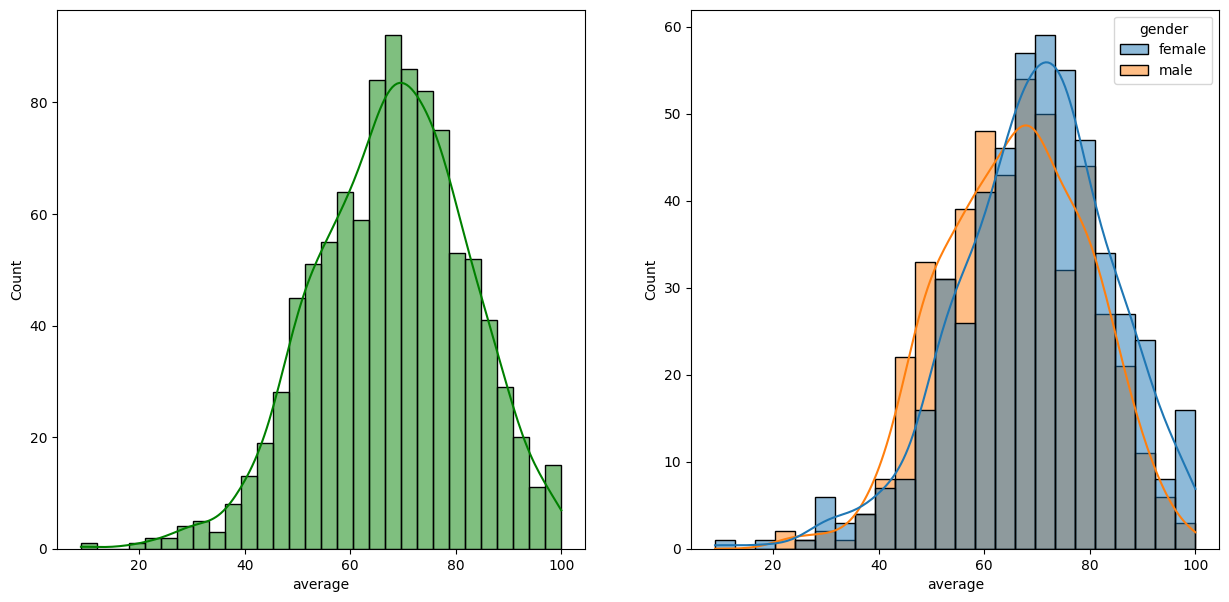

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)

sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

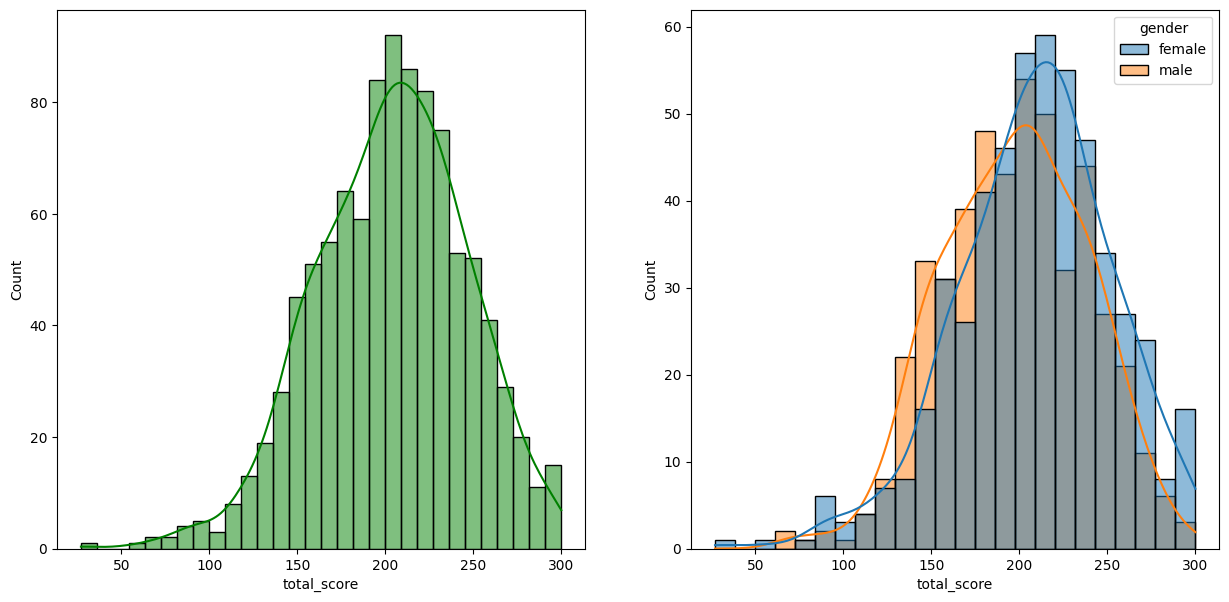

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)

sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights:
* Females perform well than male students

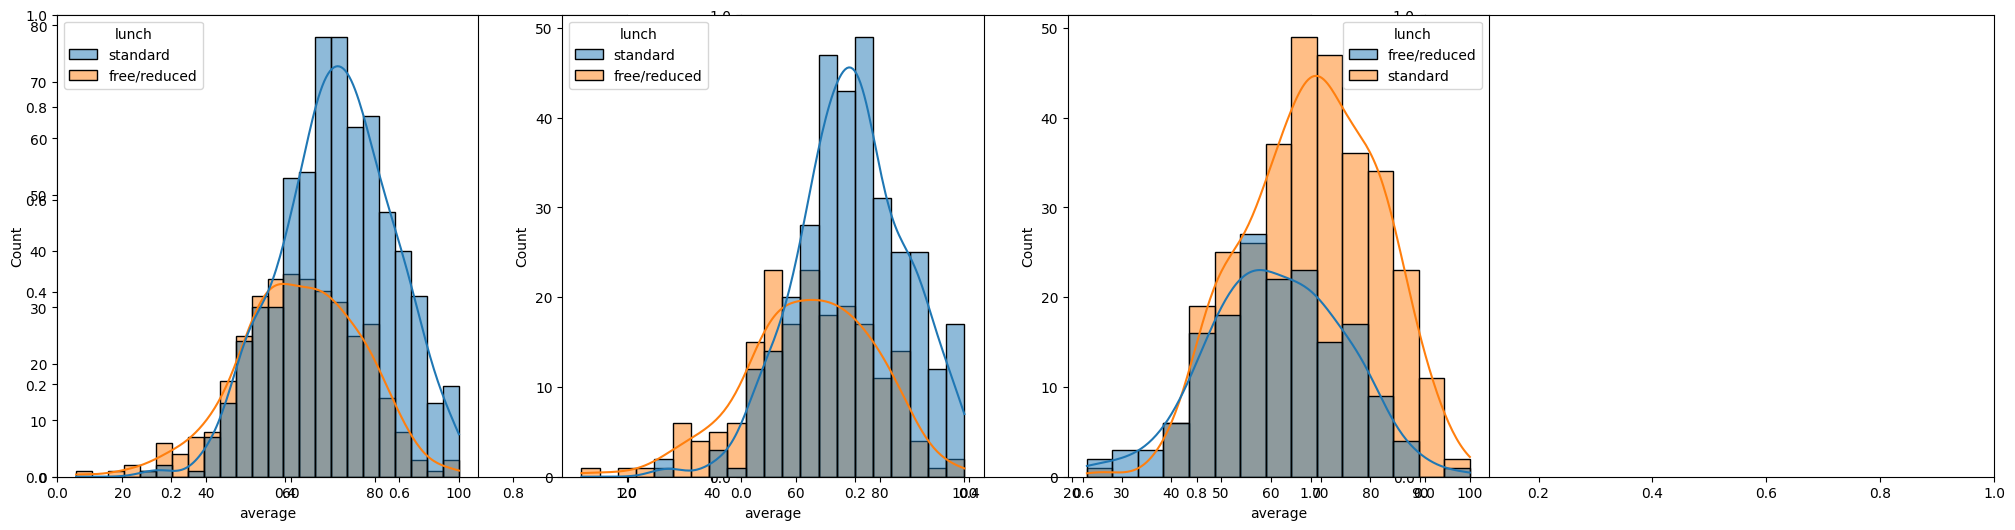

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights:
* If the Standard lunch is provided students tend to perform well irrespective of the gender

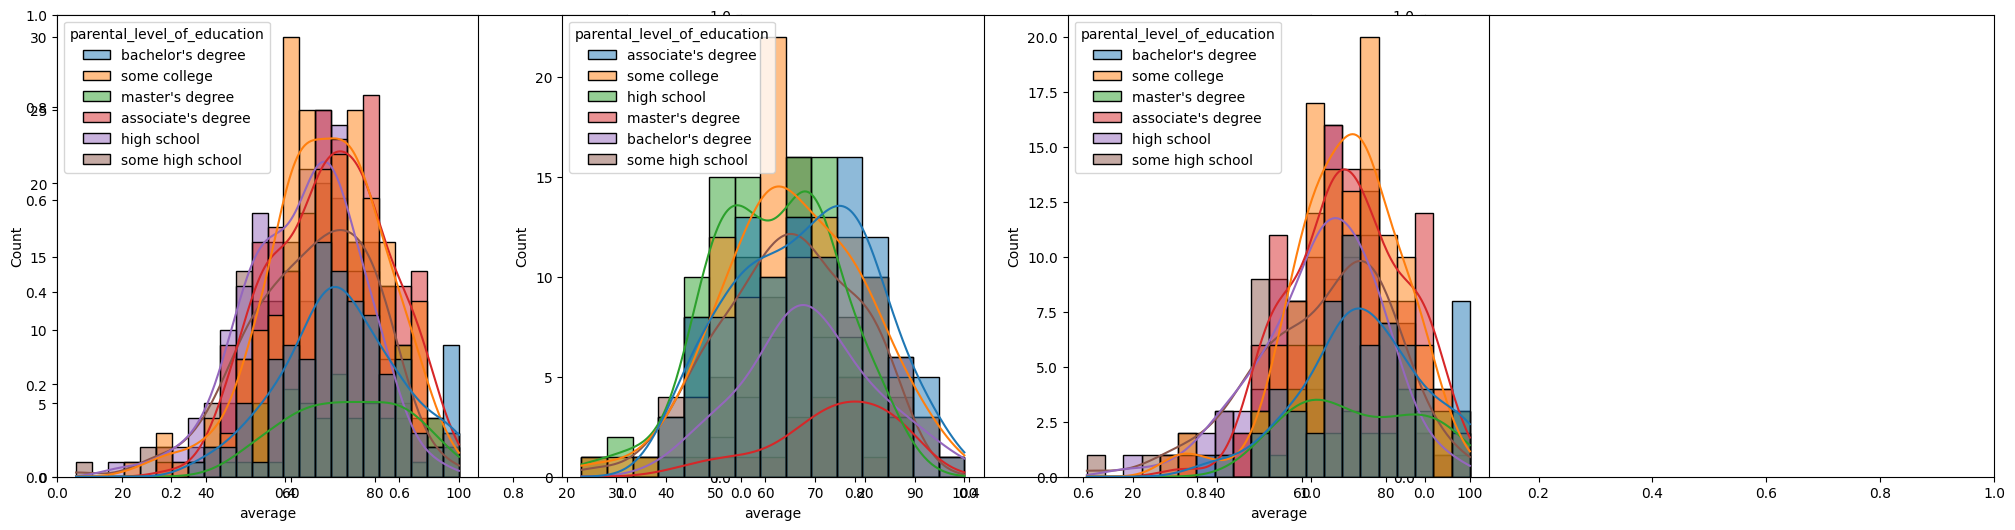

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

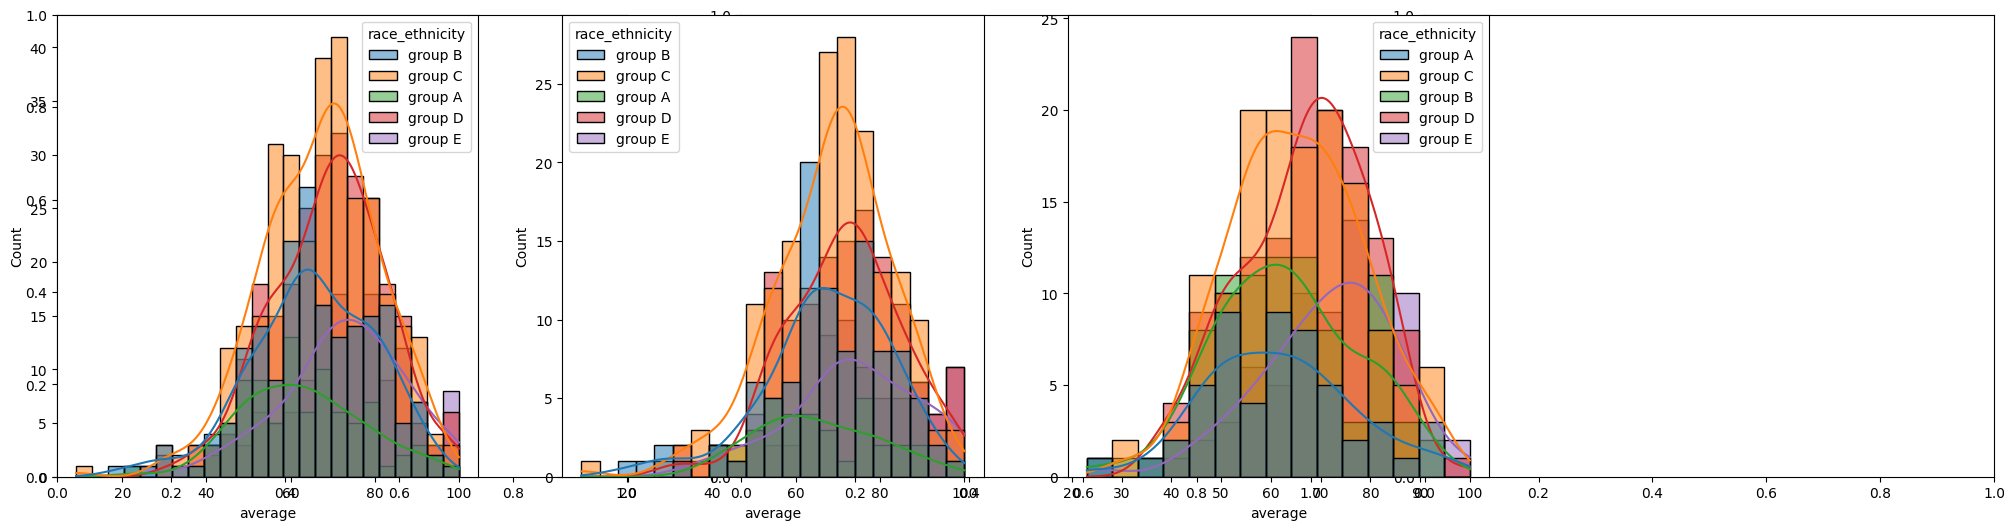

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights:
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximum score of students in all 3 subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

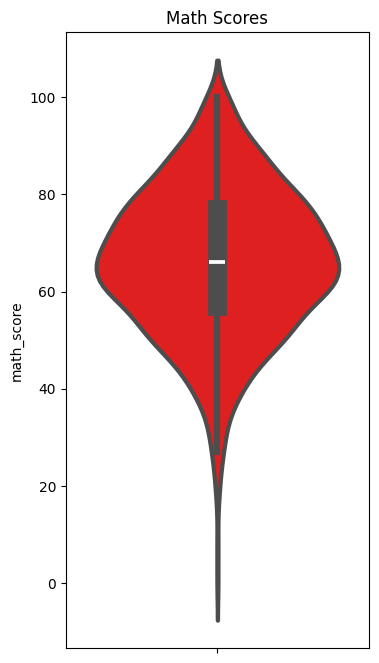

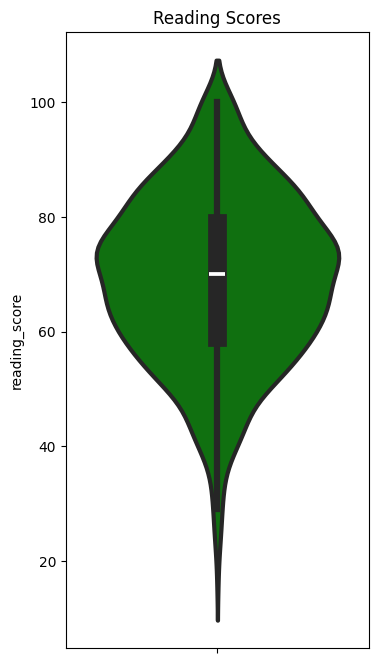

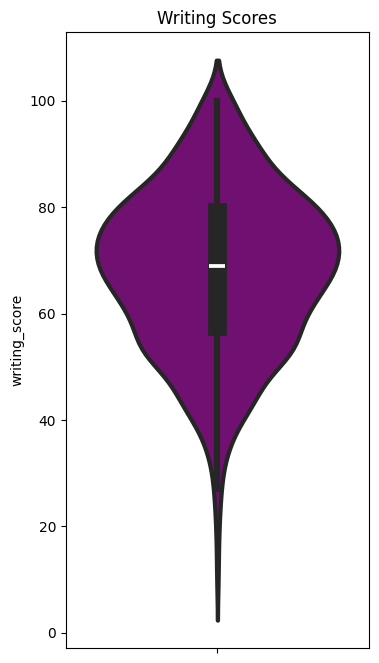

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title("Math Scores")
sns.violinplot(y='math_score',data=df ,color='red',linewidth=3)

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 2)
plt.title("Reading Scores")
sns.violinplot(y='reading_score',data=df ,color='green',linewidth=3)

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 3)
plt.title("Writing Scores")
sns.violinplot(y='writing_score',data=df ,color='purple',linewidth=3)

Insights:

from the above plot it shows the students score in between 60-80 in Maths whereas in reading and writing most of them from 50-80

4.3 Multivariate Analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

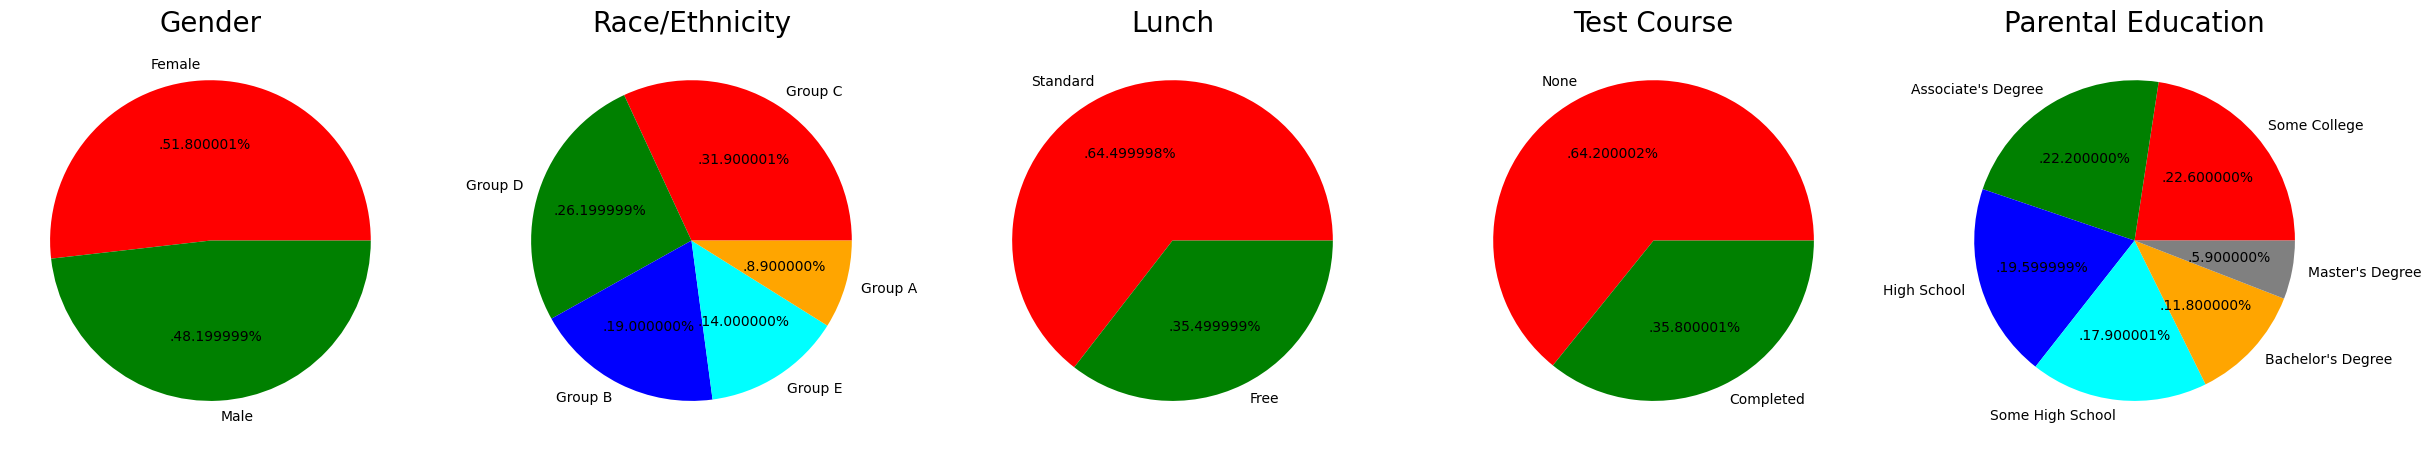

In [49]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1, 5,1)
size=df['gender'].value_counts()
labels='Female',"Male"
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize =20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')




Insights:
* Number of the male and female are almost same
* Number studets are more in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater 
* Number of students whose parental education is  Some college is greater followed closely by Associate's Degree

4.4 Feature Wise Visualization


4.4.1 Gender Column

* how is distribtuion of gender?
* is gender has any impact on student's performance ?

Univariate Analysis(How is distributed of gender?)

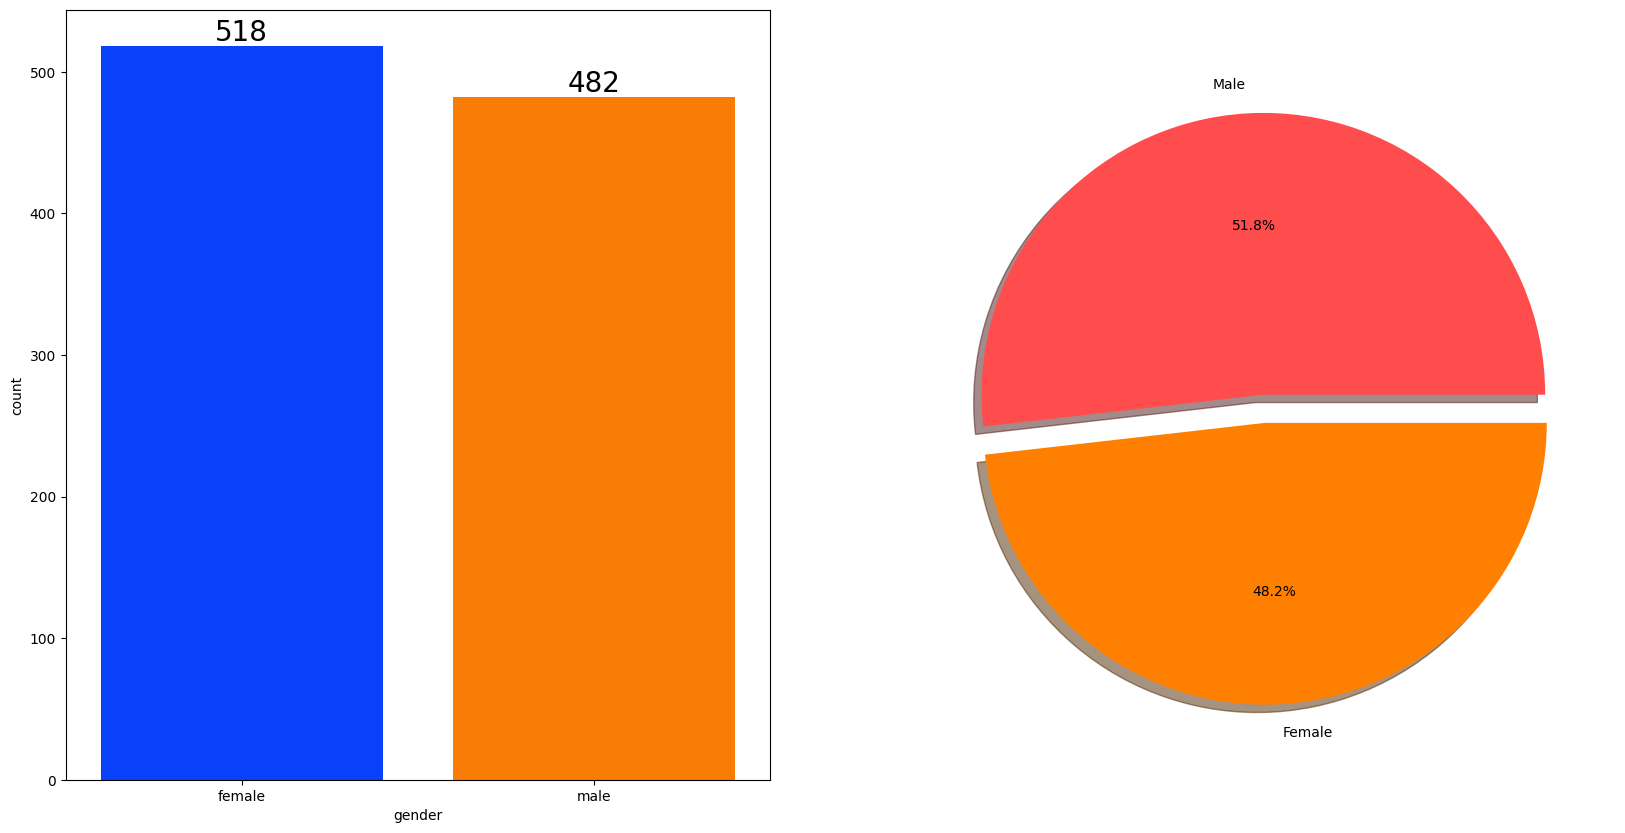

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()



Insight:
Gender has the balanced data with female and male percentage distribution

Bi-Variate Analysis (Is gender has any impact on student's performance?)

In [73]:
gender_group = df.groupby('gender')
gender_group

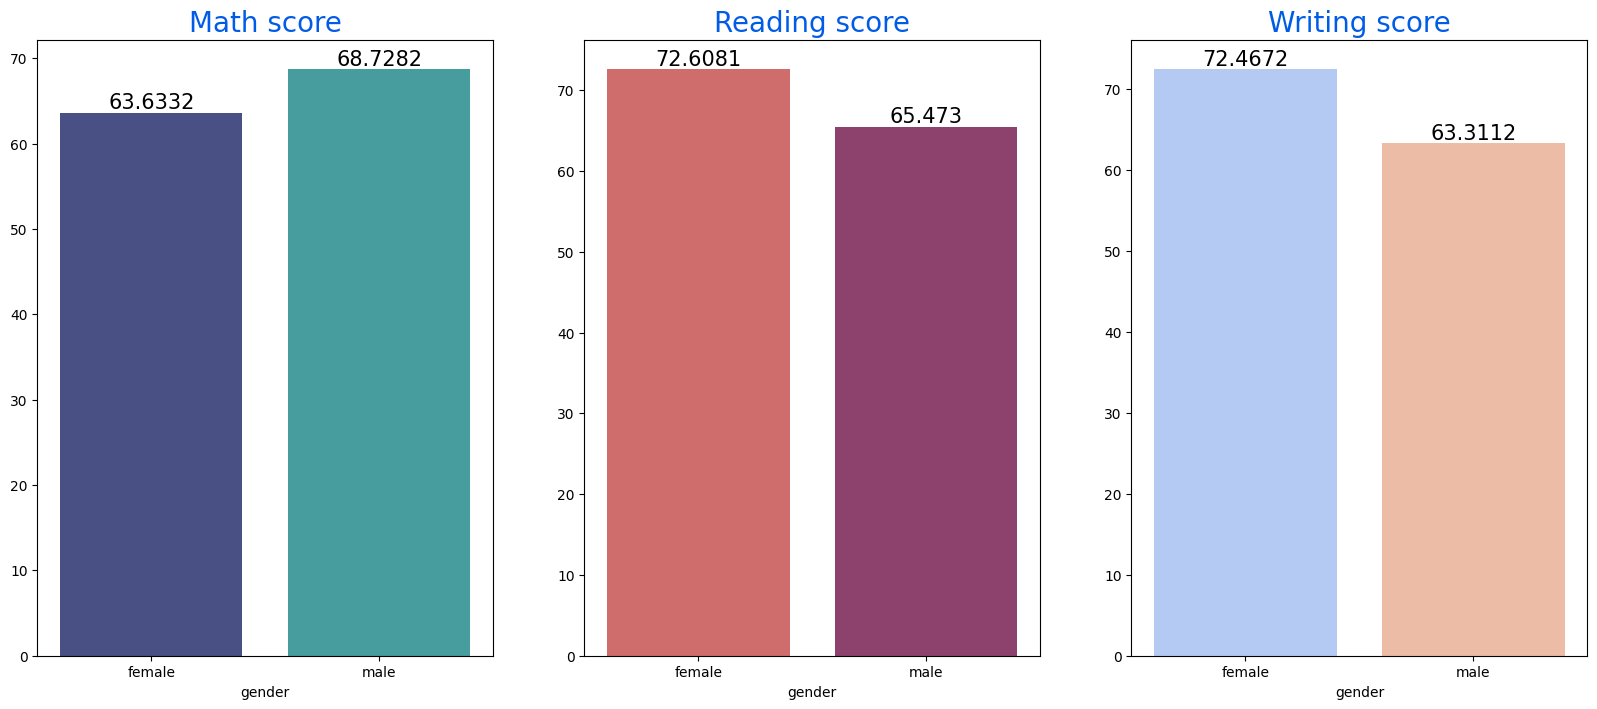

In [83]:
Group_data2=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
* male score more in the maths
* femlaes score more in the writing /reading courses

4.4.2 Race Ethicicity 

* how is group wise distribution?
* is rhtinicity has any impact on studnets' performance?

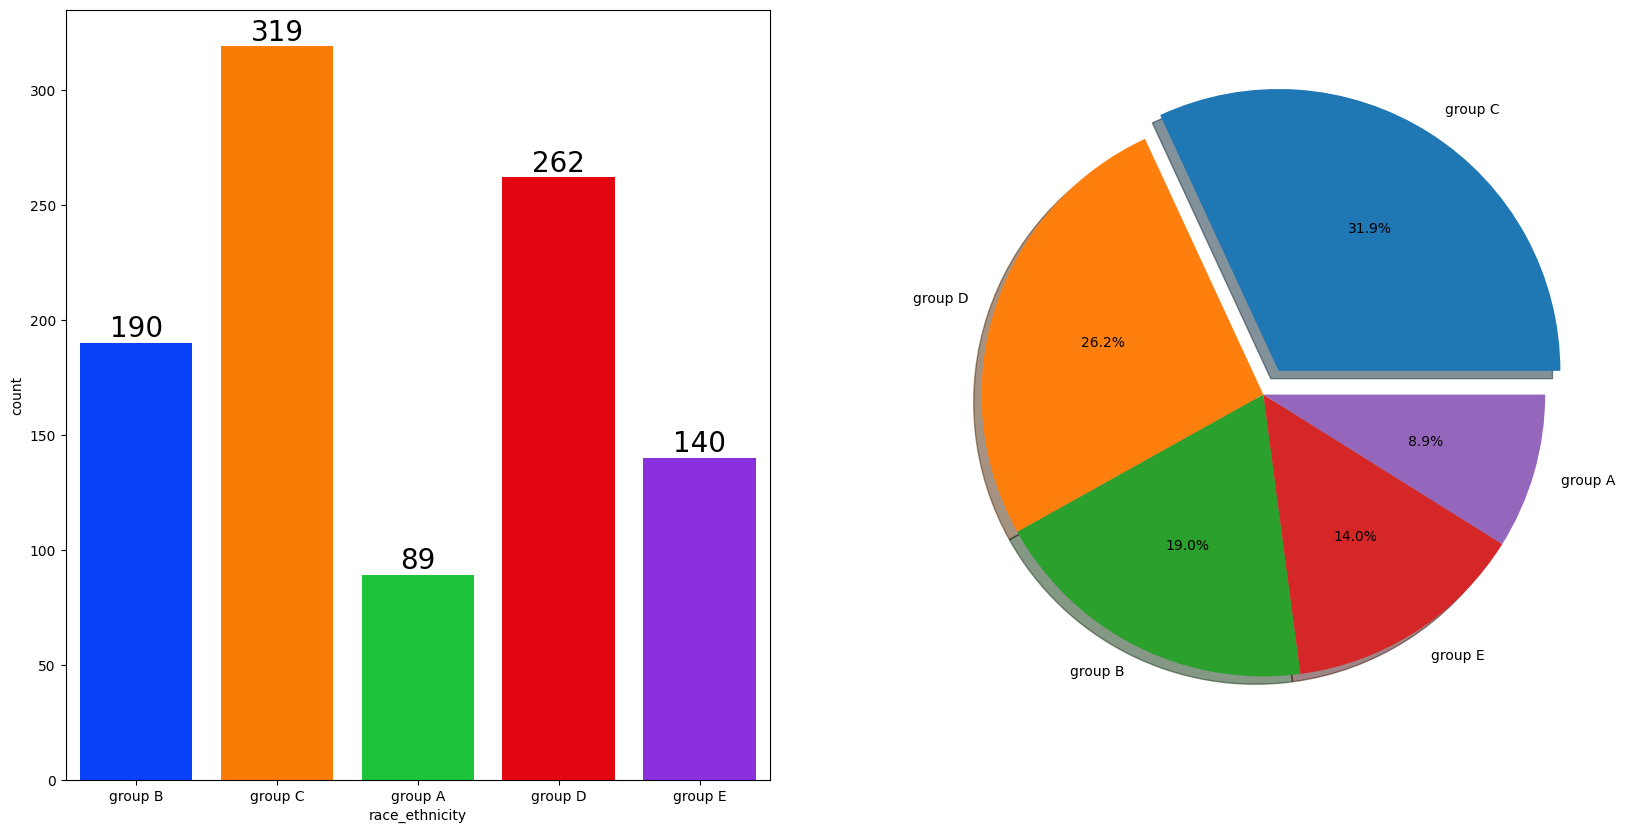

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for conatiner in ax[0].containers:
    ax[0].bar_label(conatiner,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()


Insights:
* most of the part is group c
* lowest of the part is group a

Bivariate analysis(is race/ethnicity has any impact on student's performace ?)

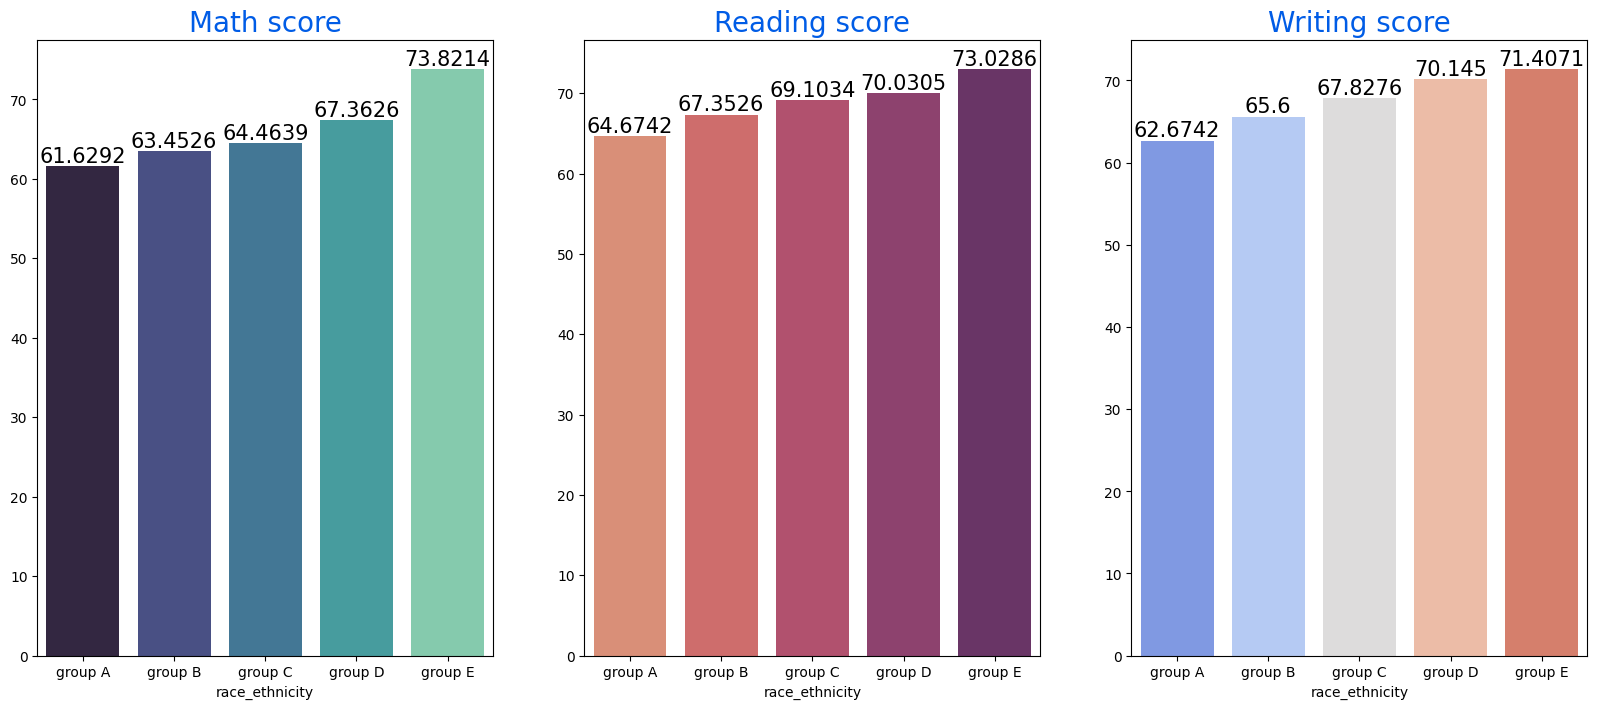

In [82]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
* group a is lowest scores and group e are the highest scorers
* lowest social status people tend to score less 

4.4.3 Parental Level Education dependency
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

Univariate analysis:

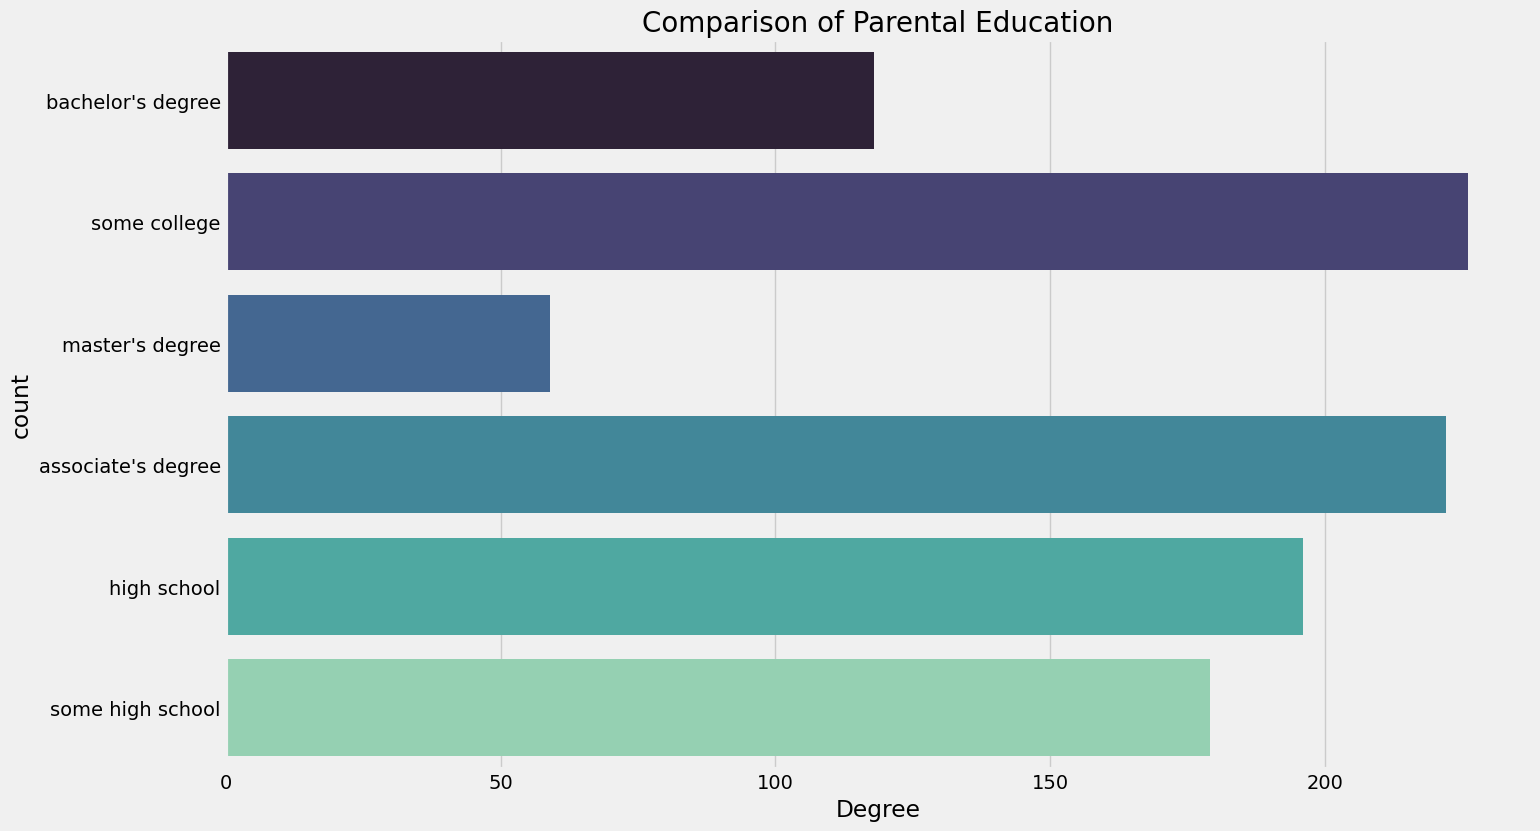

In [87]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'mako')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights:
* Max parents atleast have gone to some college

Bivariate analysis:

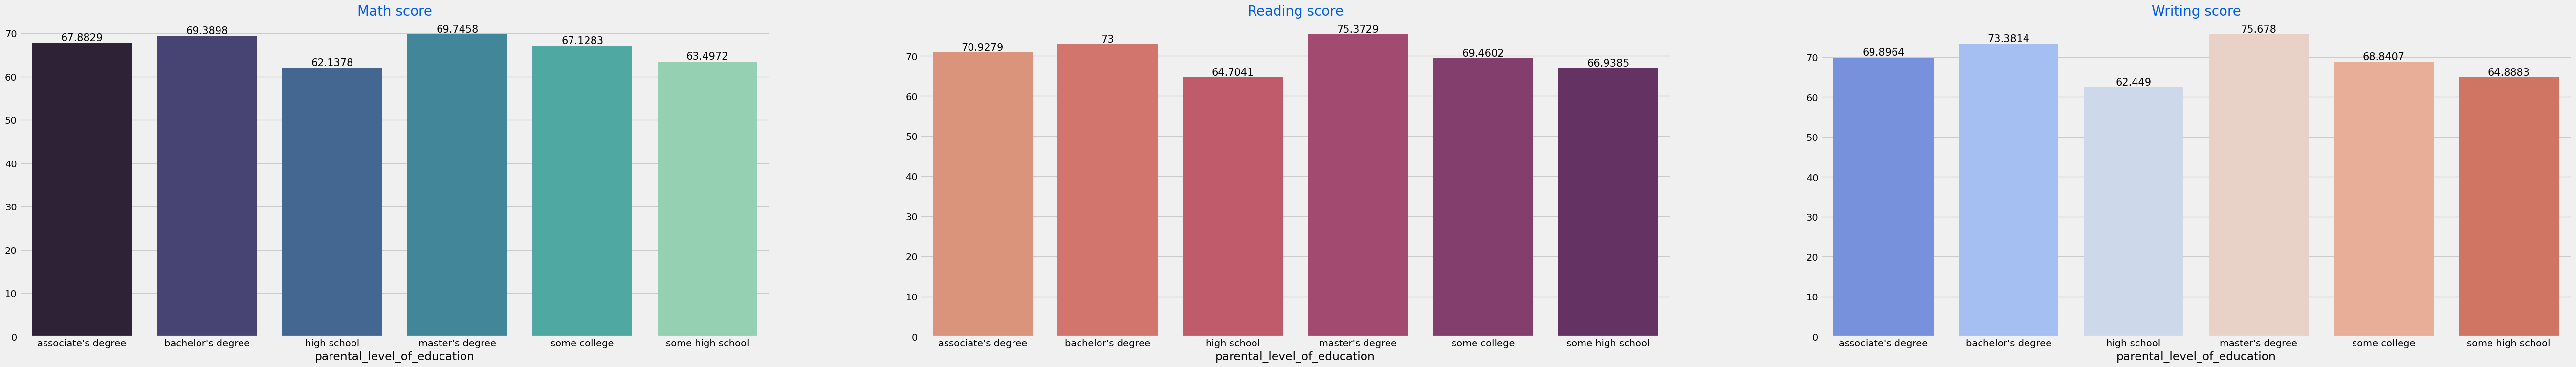

In [91]:
Group_data2=df.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(60,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
* parents who have degree nmasters and bachelores their children tend to score more

4.4.4 Lunch Dependency

* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

Univariate analysis:

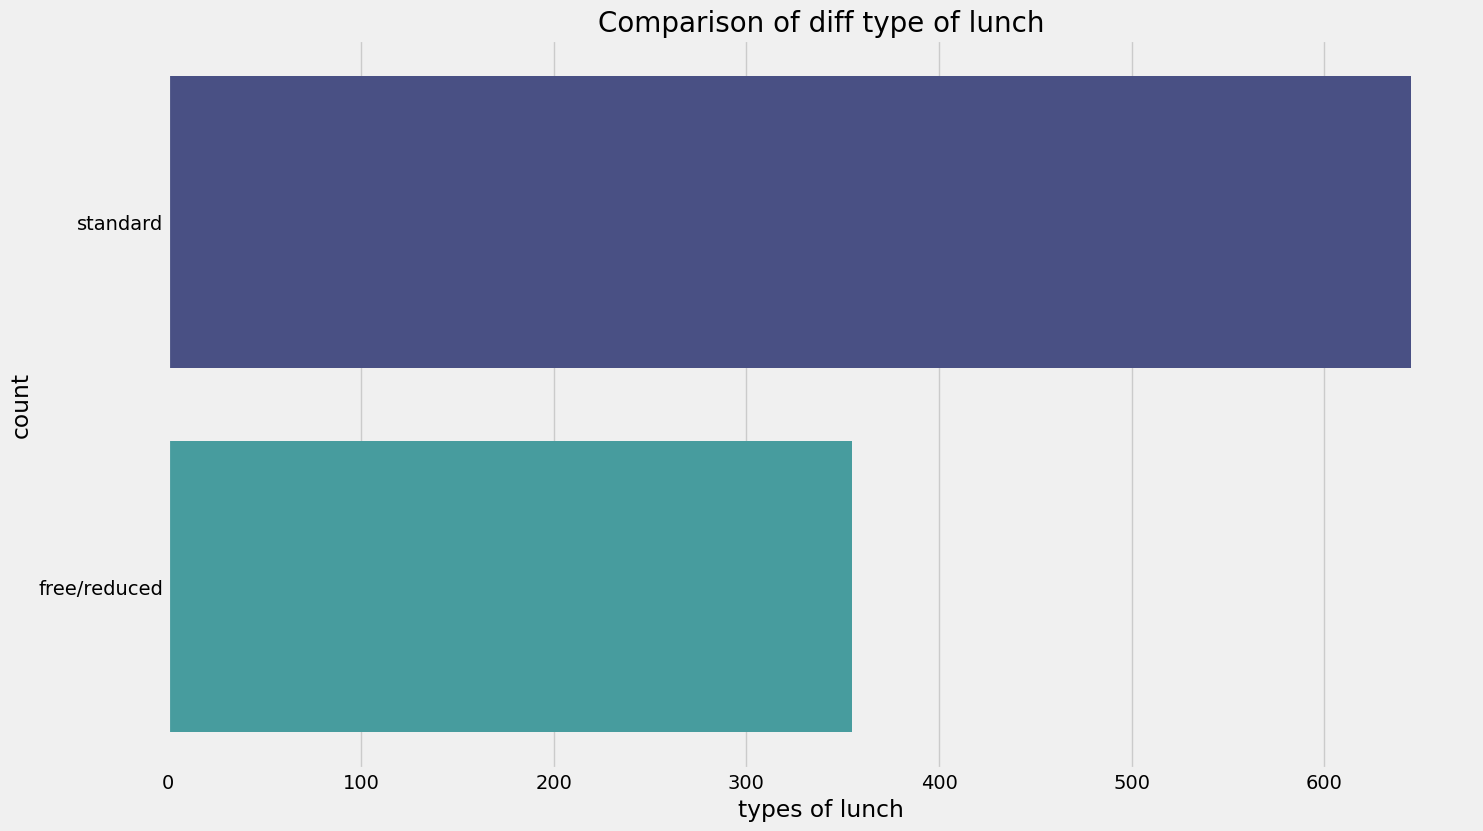

In [93]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'mako')
plt.title('Comparison of diff type of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights:
Standard food consumtion people score more

Bivariate analysis:

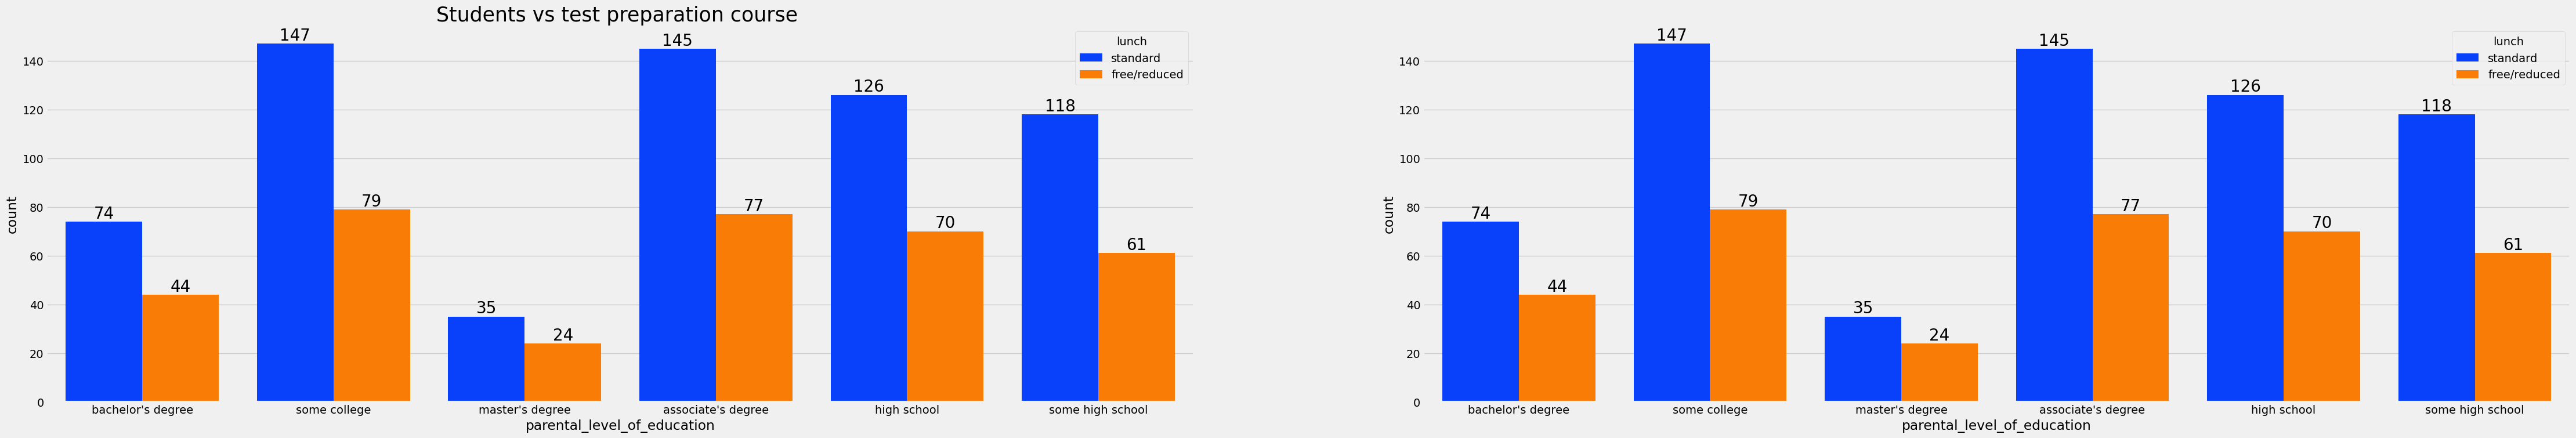

In [101]:
f,ax=plt.subplots(1,2,figsize=(50,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

Insights:
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 Test Preparation Course :
* Is test preparation is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

Univariate Analysis:

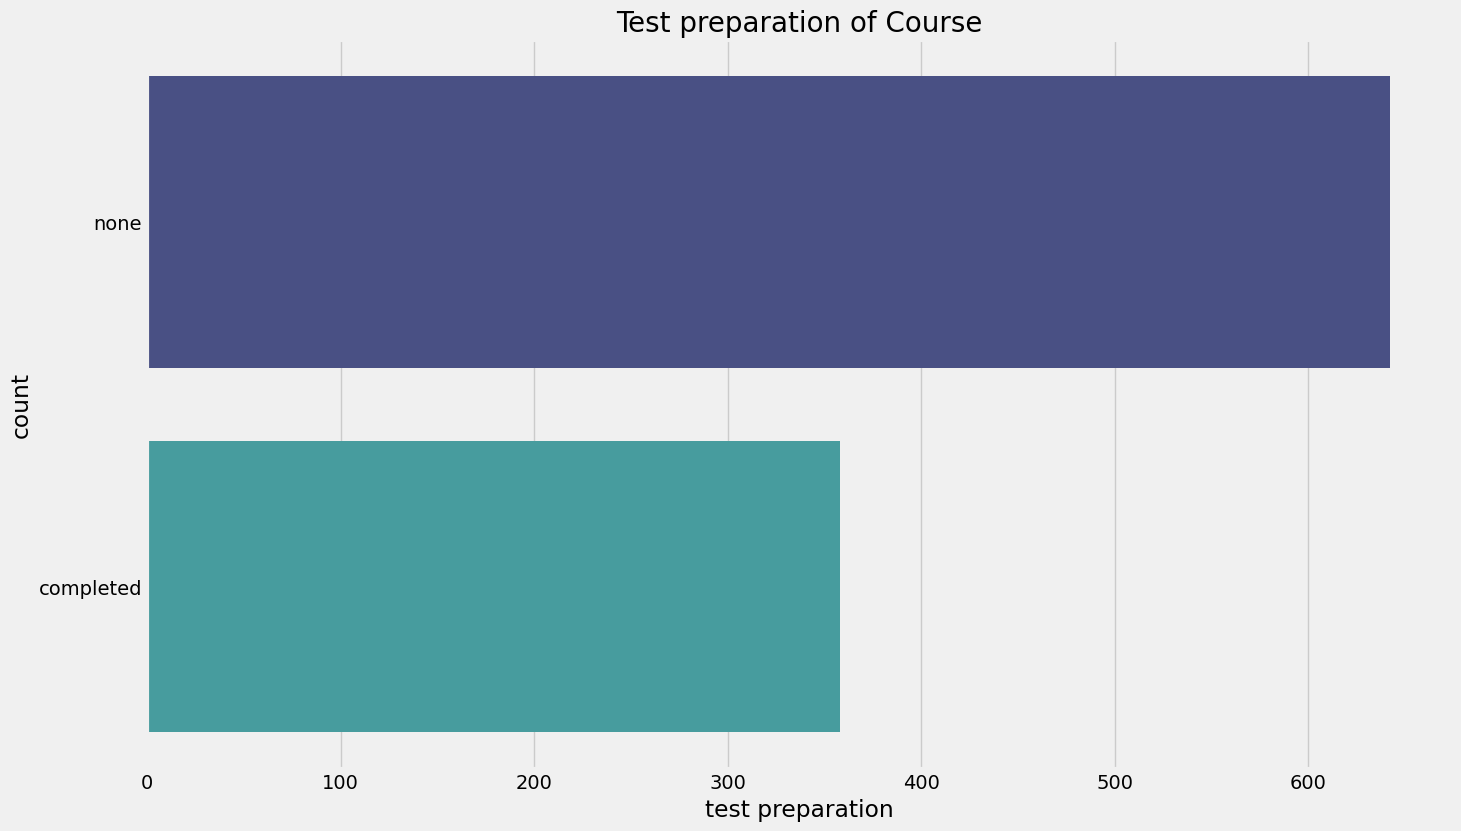

In [102]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['test_preparation_course'], palette = 'mako')
plt.title('Test preparation of Course', fontweight = 30, fontsize = 20)
plt.xlabel('test preparation')
plt.ylabel('count')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

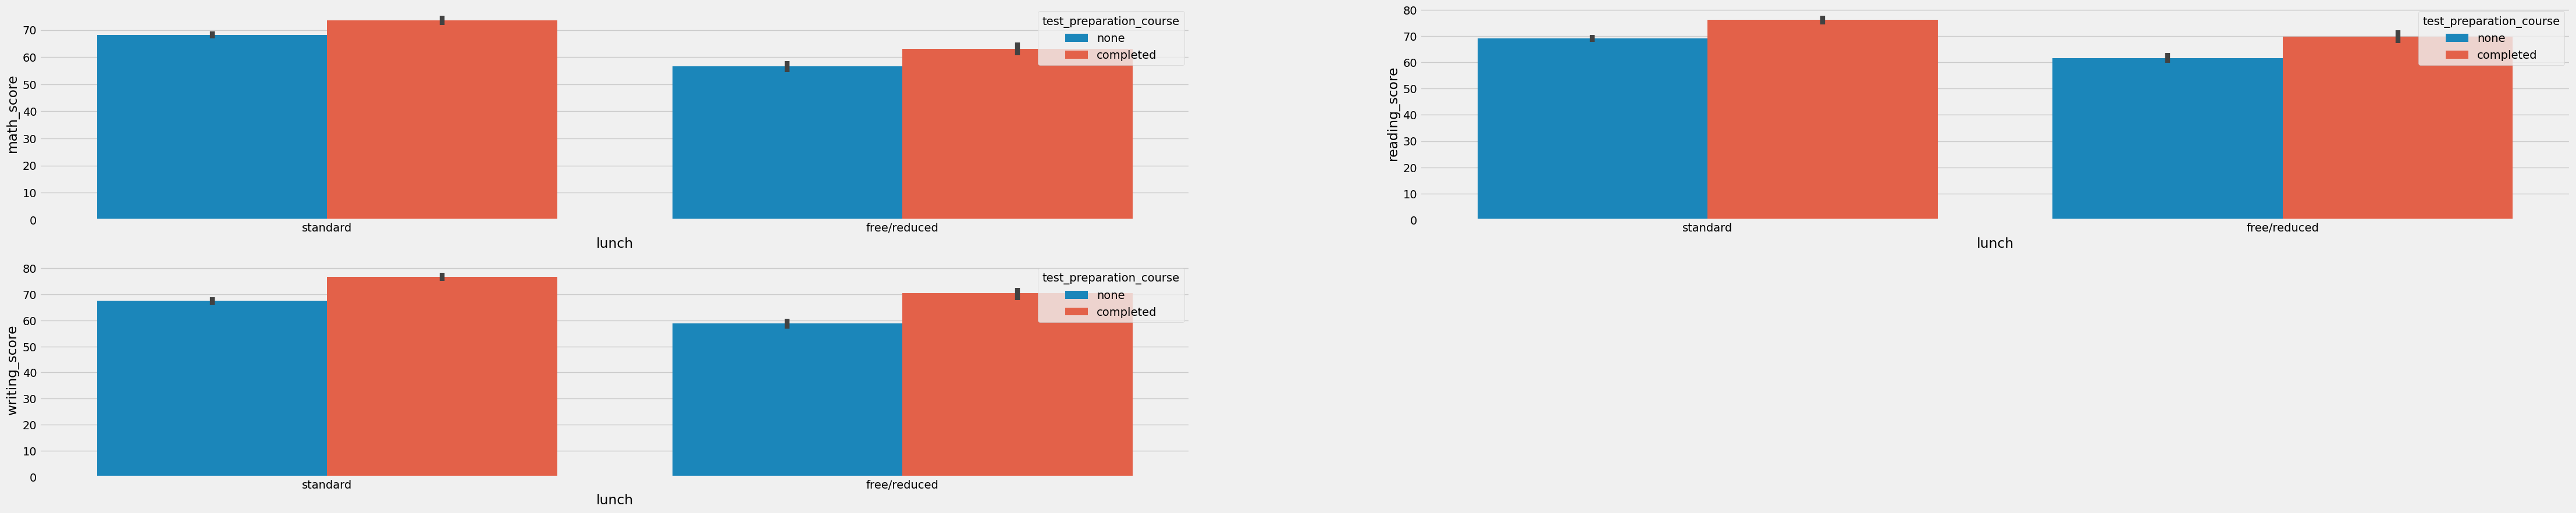

In [97]:
plt.figure(figsize=(50,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 Checking for Outliers:

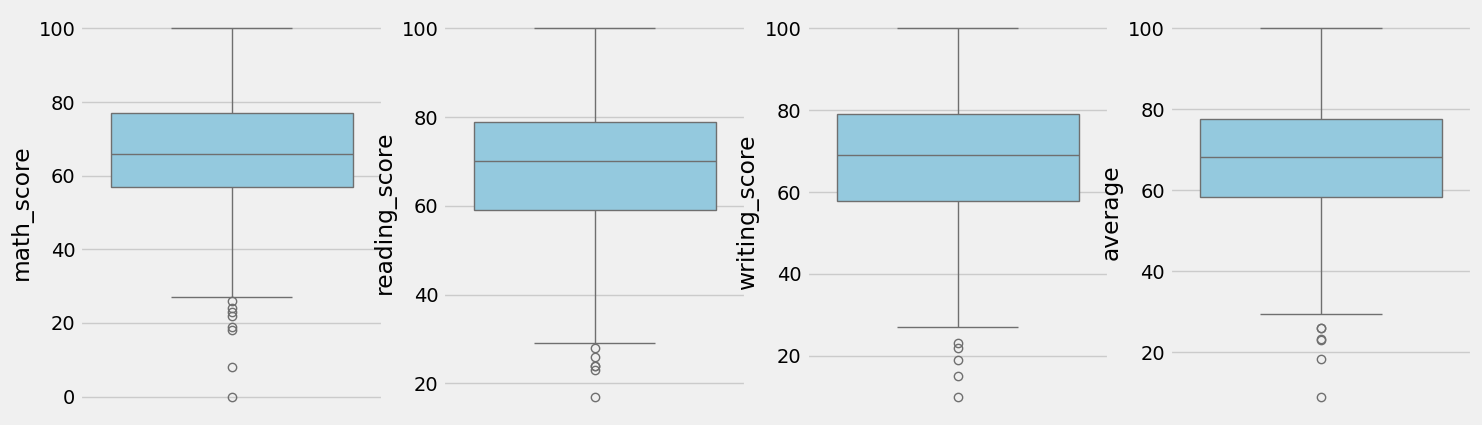

In [103]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='skyblue')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='skyblue')
plt.subplot(144)
sns.boxplot(df['average'],color='skyblue')
plt.show()


Insights:
There are some outliers

4.4.7 Multi Variate Analysis using Pairplot

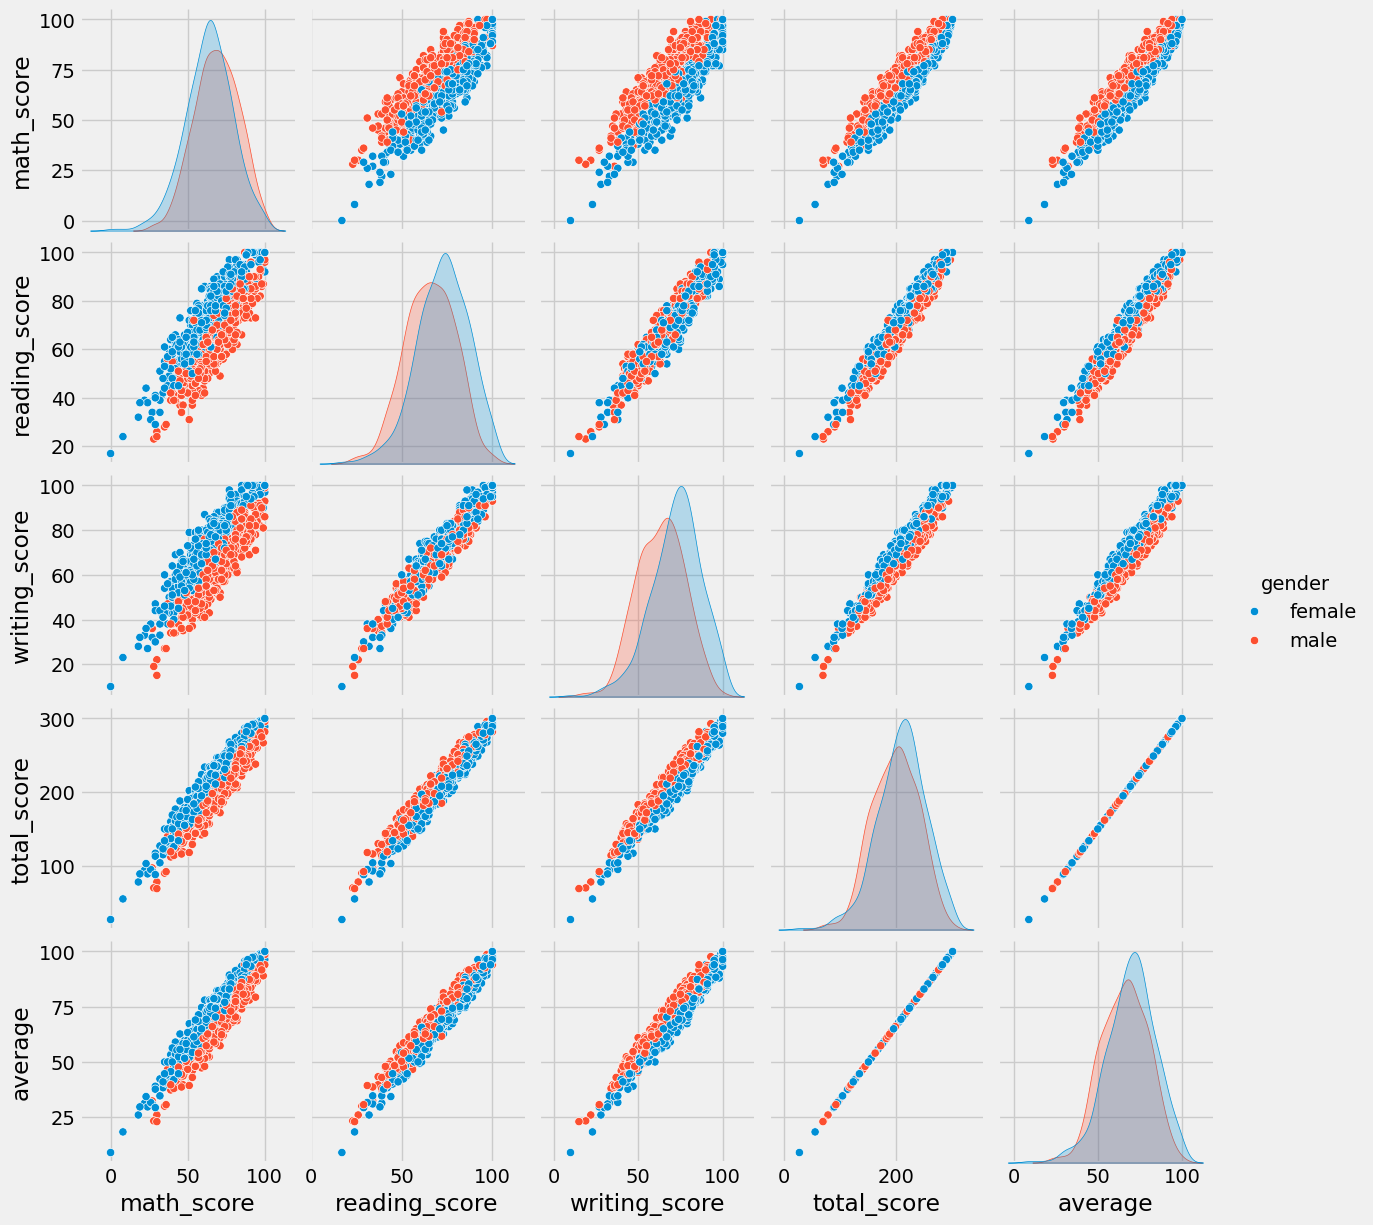

In [104]:
sns.pairplot(df,hue='gender')
plt.show()

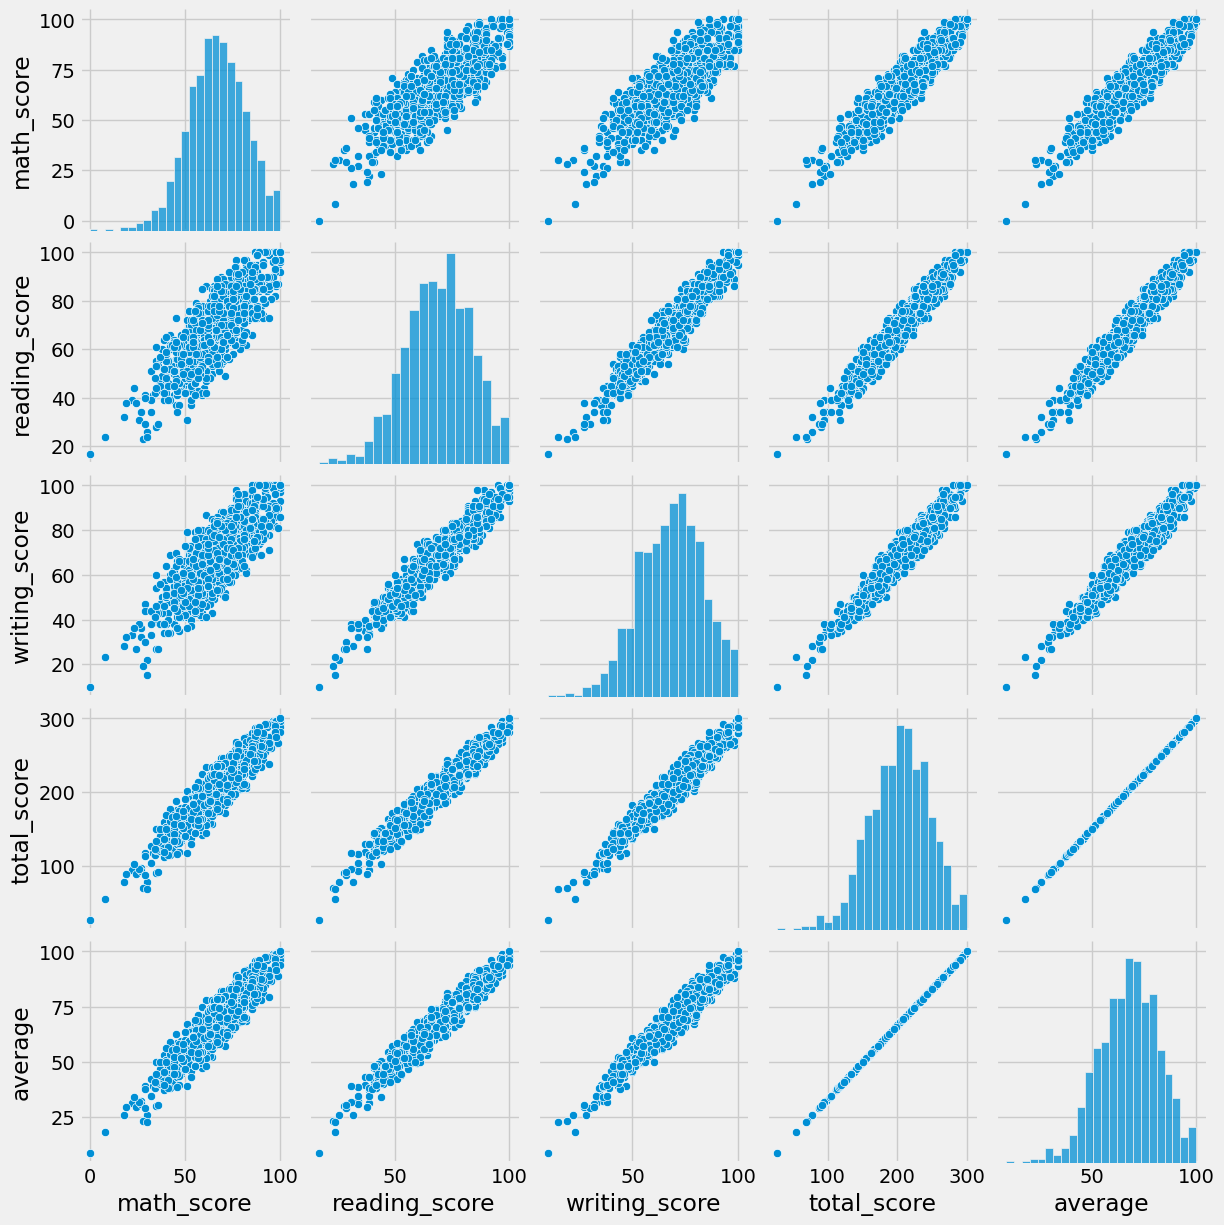

In [105]:
sns.pairplot(df)

Insights:
All are linearly related to each other

5.Conclusions:
* Students performace is related to lunch,parental education,test preparation and race.
* Females lead in pass percentage and are the toppers
* Finishing prepratin is beneficial